### Задача 1.1
Проверить мощность и консервативность критериев Лиллиефорса, Харке-Бера, Шапиро-Улика для выборок из следующих распределений:
* Нормальное
* Лапласа
* Стьюдента
* Усеченное нормальное распределение (модуль каждого элемента выборки не превосходит 2)

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import jarque_bera, shapiro

$Power = P(reject \; H_0| H_1)$

$Type \; I \; error = P(reject \; H_0|H_0)$

$Type \; II \; error = P(accept \; H_0|H_1)$

Для того чтобы получить адекватную оценку мощности и ошибки первого рода, будем делать по iters (по умолчанию iters=100) выборок размера sample_size из интересующего на распрделения (norm, laplace, student, truncnorm). Если бы мы брали только одну выборку, то результат мог быть обусловлен тем, что взята неудачная выборка (это особенно критично для оценки при маленьком размере выборки). Данную процедуру проделываем для различного размера выборок (различных значений sample size)

Оценить мощность для нормального распредления не представляется возможным, так как для него альтернативная гипотеза (H1: распредление не является нормальным) всегда неверна. Аналогично, невозможно оценить ошибку первого рода для всех распределений, кроме нормального, так как для них нулевая гипотеза (H0: распределение является нормальным) всегда неверна. 

Поэтому будем отдельно оценивать мощность критериев для распределений Лапласа, Стьюдента и усеченного нормального, а ошибку первого рода для нормального распределения. 

Будем строить мощность для всех трёх критериев на одном графике, чтобы было проще сравнивать.

P.S. Для каждого теста можно бы было брать 50% семплов из нормального распределения и 50% семплов из другого. Но в этом нет осбого смысла в данной задаче. Легче сделать это на разных графиках. Поэтому делаем так, как предложено ранее. 

In [5]:
def generator(gtype, iters, sample_size, df, trunc):
    
    if gtype=='norm':
        return [[lilliefors(data)[1],
                 jarque_bera(data)[1],
                 shapiro(data)[1]] for data in [st.norm.rvs(size=sample_size) for _ in range(iters)]]
    
    elif gtype=='laplace':
        return [[lilliefors(data)[1],
                 jarque_bera(data)[1],
                 shapiro(data)[1]] for data in [st.laplace.rvs(size=sample_size) for _ in range(iters)]]
    
    elif gtype=='student':
        return [[lilliefors(data)[1],
                 jarque_bera(data)[1],
                 shapiro(data)[1]] for data in [st.t.rvs(df=df, size=sample_size) for _ in range(iters)]]
    
    elif gtype=='truncnorm':
        return [[lilliefors(data)[1],
                 jarque_bera(data)[1],
                 shapiro(data)[1]] for data in [st.truncnorm.rvs(-trunc, trunc, size=sample_size) for _ in range(iters)]]
    else:
        raise ValueError("There is no such distribution in this task!")

In [6]:
def plot_power(gtype, ptype='Power', iters=100, MAX_SAMP=300, step=10, df=1, trunc=2): 

    sample_sizes = range(10, MAX_SAMP+1, step)

    power_lilliefors, power_jarque_bera, power_shapiro = [], [], []

    for sample_size in sample_sizes:

        p_values = generator(gtype, iters, sample_size, df, trunc)

        p_values = np.array(p_values).T
        p_values_lilliefors, p_values_jarque_bera, p_values_shapiro = p_values[0], p_values[1], p_values[2]
        
        power_lilliefors.append(len(p_values_lilliefors[p_values_lilliefors < 0.05]) / iters)
        power_jarque_bera.append(len(p_values_jarque_bera[p_values_jarque_bera < 0.05]) / iters)
        power_shapiro.append(len(p_values_shapiro[p_values_shapiro < 0.05]) / iters)
        

    fig, axes = plt.subplots(figsize=(16, 10))

    axes.plot(sample_sizes, power_lilliefors, sample_sizes, power_jarque_bera, sample_sizes, power_shapiro)
    if ptype == 'Power':
        axes.axhline(y = 1, color='r', linestyle='--')
    else:
        axes.axhline(y = 0.05, color='r', linestyle='--')    
        
    axes.legend(['Lilliefors', 'Jarque-Bera', 'Shapiro'], fontsize = 15)
    axes.set_xlabel('Sample size', fontsize = 15)
    axes.set_ylabel(ptype, fontsize = 15)
    
    if gtype=='student':
        comment = ' with df = ' + str(df)
    elif gtype=='truncnorm':
        comment = ' with trunc = ' + str(trunc)   
    else:
        comment = ''
        
    axes.set_title(str.upper(gtype) + ' distribution' + comment, fontsize = 18)
    #ptype + ' from sample size for ' + 

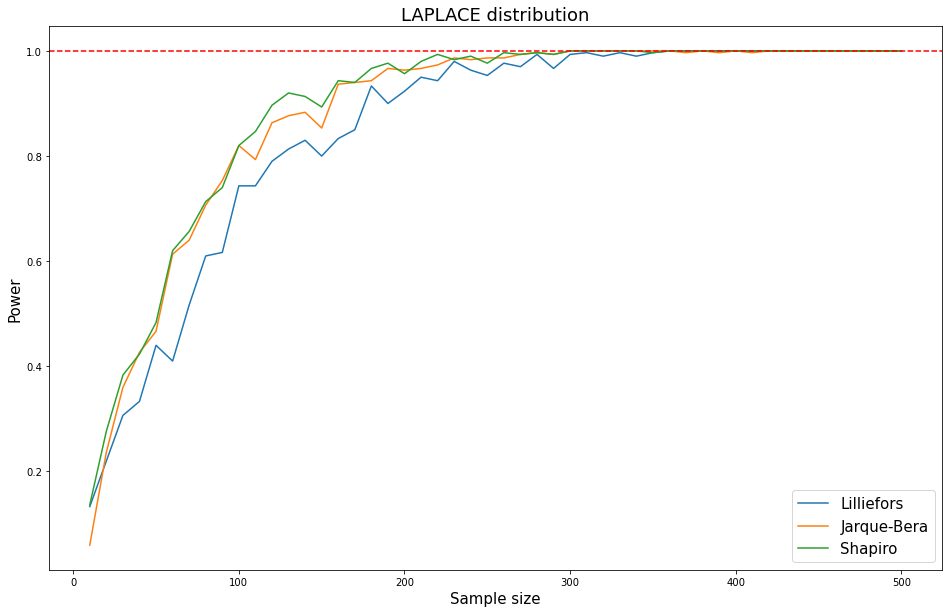

In [7]:
plot_power('laplace', iters=300, MAX_SAMP=500)

Для выборок из распределения Лапласа мощность всех критериев достигает 1 при размере выборки (sample size) примерно равном 300 (для критерия Лиллиефорса чуть позже). 

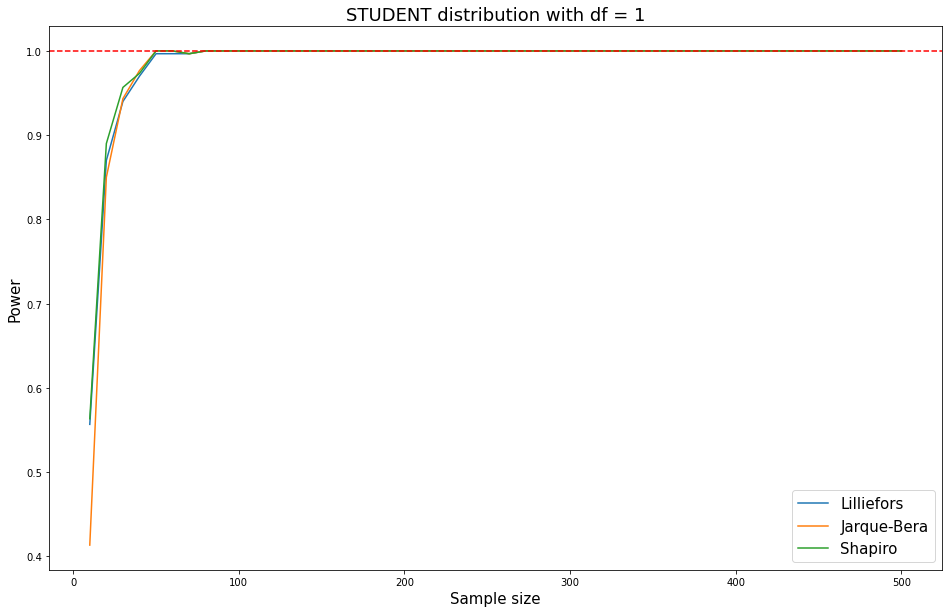

In [8]:
plot_power('student', iters=300, MAX_SAMP=500, df=1)

Для выборок из распределения Стьюдента с одной степенью свободы (df=1) мощность всех критериев достигает 1 при размере выборки (sample size) примерно равном 70.

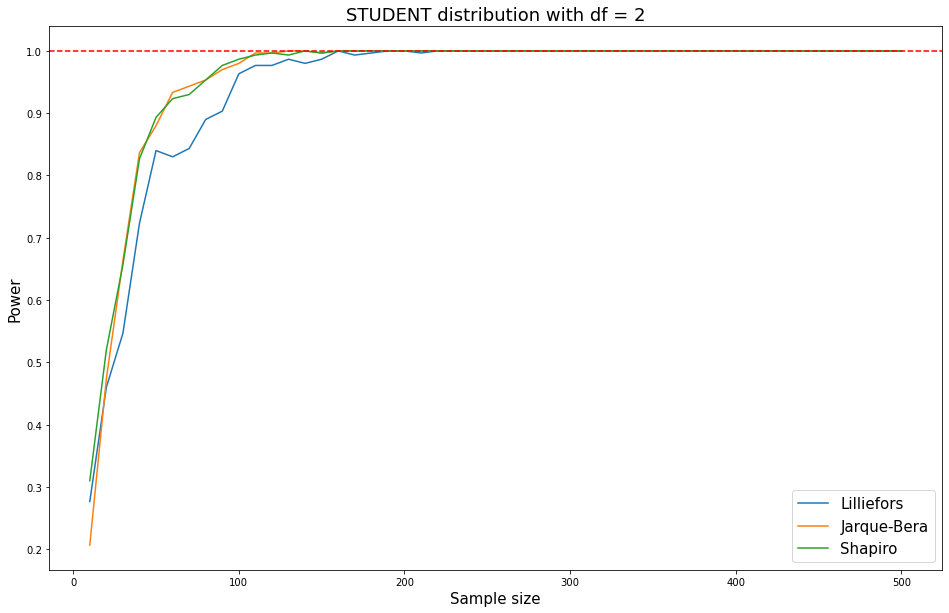

In [9]:
plot_power('student', iters=300, MAX_SAMP=500, df=2)

Для выборок из распределения Стьюдента с двумя степенями свободы (df=2) мощность всех критериев достигает 1 при размере выборки (sample size) примерно равном 150 (для критерия Лиллиефорса чуть позже).

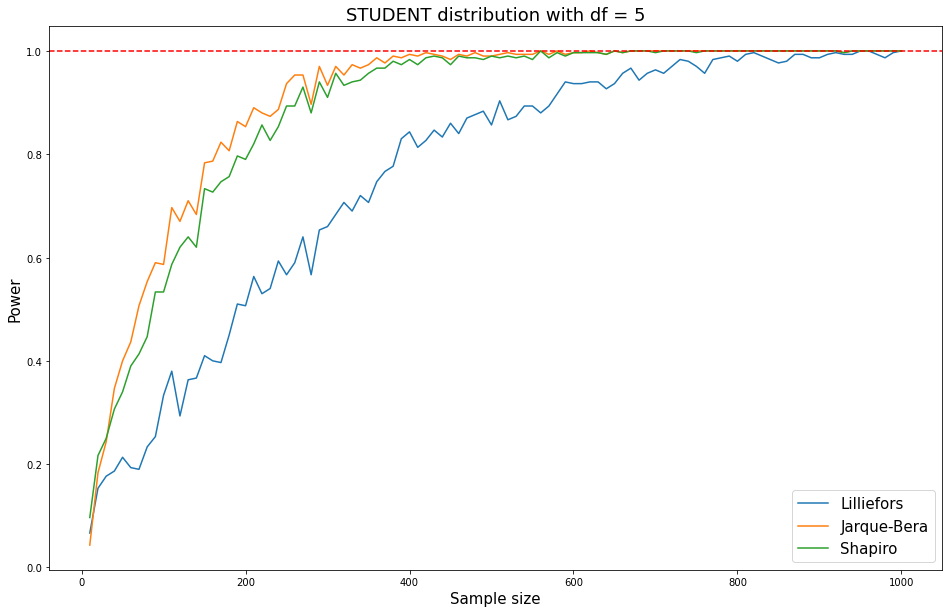

In [10]:
plot_power('student', iters=300, MAX_SAMP=1000, df=5)

Для выборок из распределения Стьюдента с пятью степенями свободы (df=5) мощность критериев Харке-Бера и Шапиро-Уилка достигает 1 при размере выборки (sample size) приблизительно равном 600, для критерия Лиллиефорса только при размере выборок больше 1000.

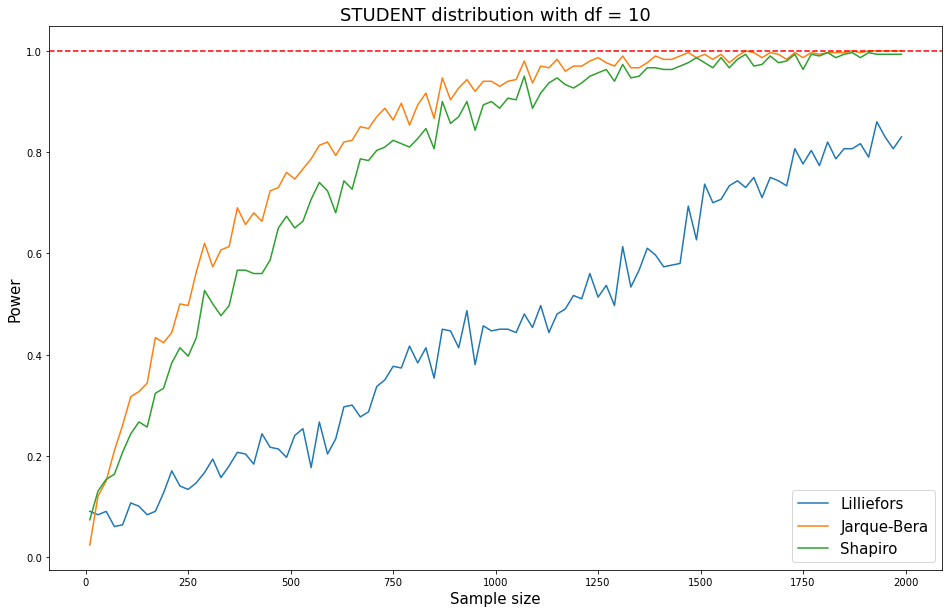

In [11]:
plot_power('student', iters=300, MAX_SAMP=2000, step=20, df=10)

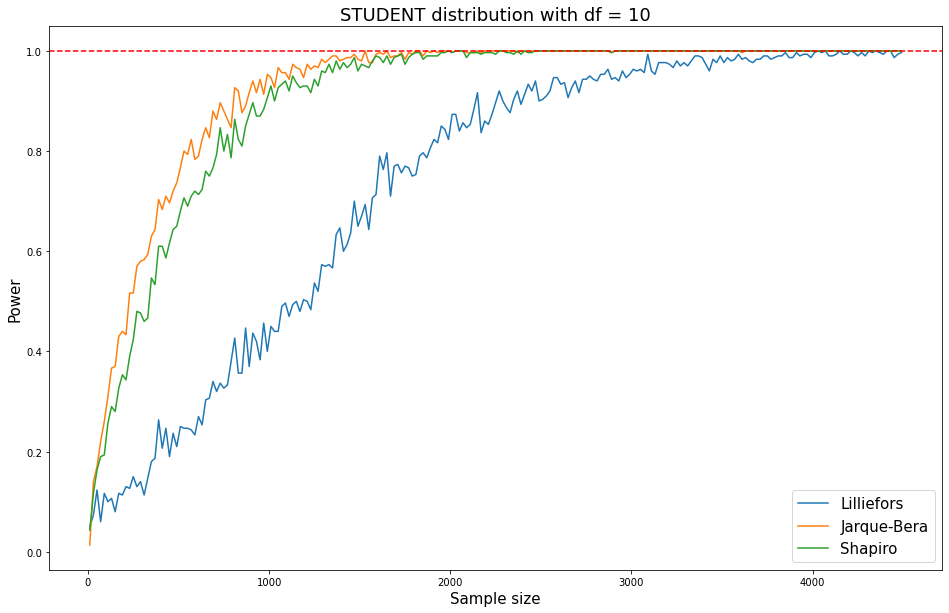

In [12]:
plot_power('student', iters=300, MAX_SAMP=4500, step=20, df=10)

Для выборок из распределения Стьюдента с дестятью степенями свободы (df=10) мощность критериев Харке-Бера и Шапиро-Уилка достигает 1 только при размере выборки (sample size) приблизительно равном 1900, для критерия Лиллиефорса только при размере выборок больше 4000. Это обусловлено тем, что с ростом степеней свободы распределения стьюдента оно приближается к нормальному.

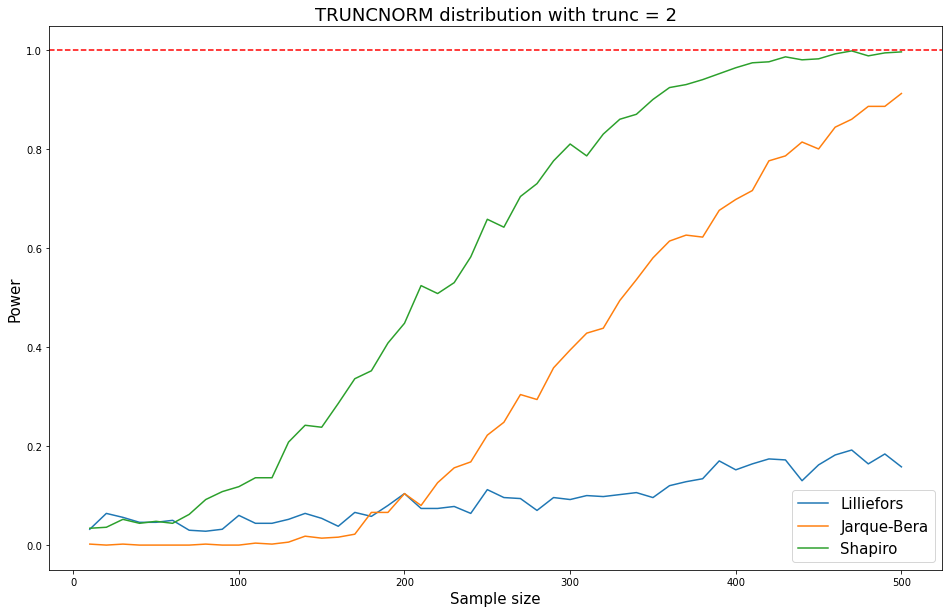

In [13]:
plot_power('truncnorm', iters=500, MAX_SAMP=500, trunc=2)

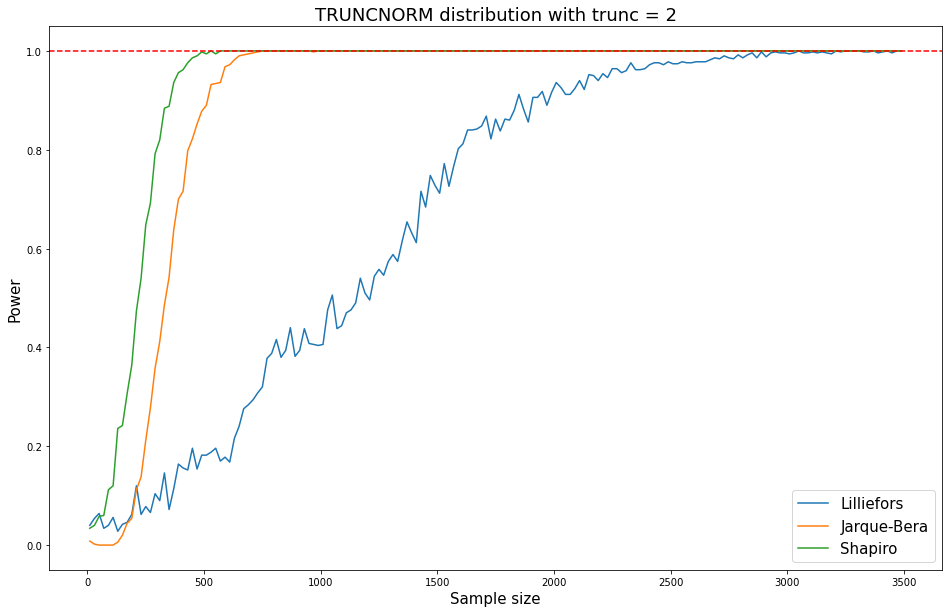

In [14]:
plot_power('truncnorm', iters=500, MAX_SAMP=3500, step=20, trunc=2)

Для выборок из усеченого нормального распределения с trunc=2 (модуль каждого элемента не превосходит 2) мощность критерия Шапиро-Уилка достигает 1 при размере выборки (sample size) приблизительно равном 500, для критерия Харке-Бера при размере выборки приблизительно равном 750, для критерия Лиллиефорса только при размере выборок больше 3000.

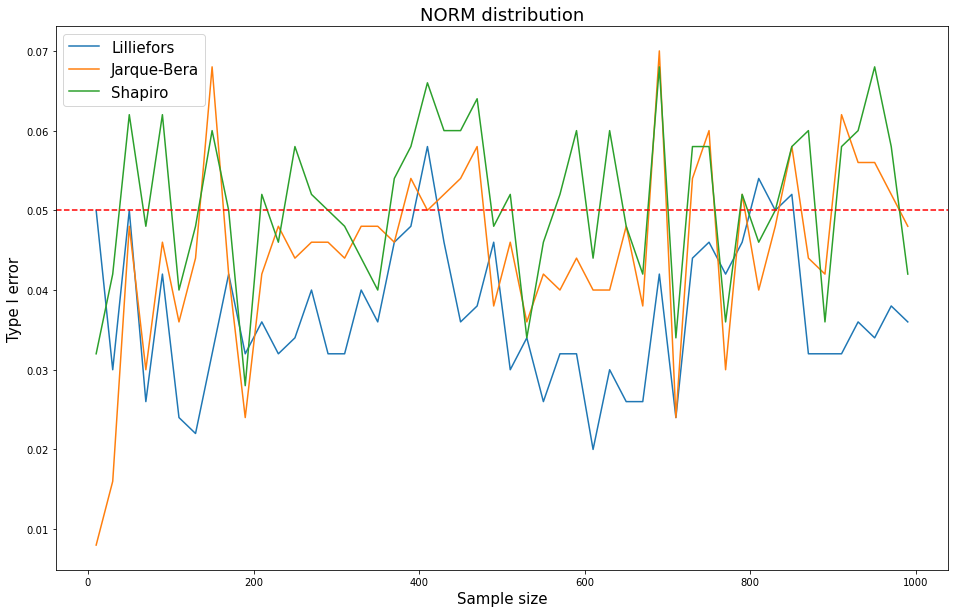

In [15]:
plot_power('norm', ptype='Type I error', iters=500, step=20, MAX_SAMP=1000)

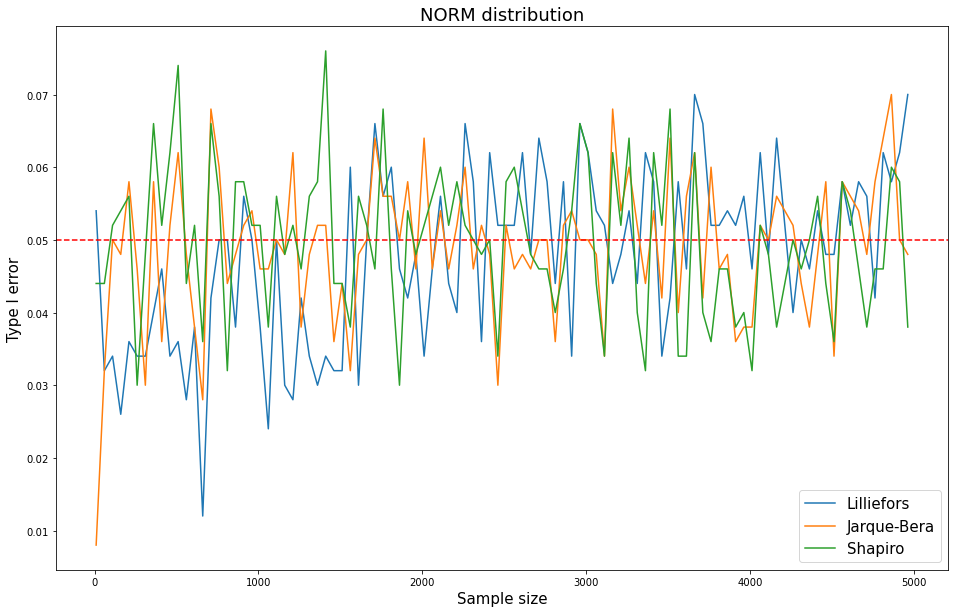

In [16]:
plot_power('norm', ptype='Type I error', iters=500, step=50, MAX_SAMP=5000)

Критерии не являются консервативными. Истинная вероятность ошибки первого рода не ограничена сверху уровнем значимости 0.05, хоть и колеблется вблизи этого значения для всех критериев. 

### Вывод:
* Критерии Шипиро-Уилка и Харке-Бера близки по мощности. Для некоторых распрделений первый имеет бОльшую мощность, для других - второй. Для рассмотренных распределений они достигают мощности равной 1 при разумном размере выборки. 
* Критерий Лиллиефорса слабее критериев Шипиро-Уилка и Харке-Бера для всех рассмотренных распределений. В осбенности его недостаток заметен для распределений, близких к нормальным (усеченное нормальное, распределение Стьюдента с числом степеней свободы больше 4). для таких распределений его мощность достигает 1 только при очень большом размере выборки (в 2-4 раза больше, чем для критериев Шипиро-Уилка и Харке-Бера). 
* Все критерии неконсервативны, хоть и вероятность истинной ошибки первого родя для них близка к 0.05 (выбранный уровень значимости)